In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [71]:
# import the csv file: 'Chinese Thermal Comfort Dataset Heating Season_tsv.csv' in the current folder
df = pd.read_csv('CN_DB.csv')
df.head()

,suject_id,timestamp,season,city,climate,building_type,cooling_type,gender,age,ht,...,clo,met,ta,rh,vel,tg,top,tr,t_out,latitude
0,1,1/30/19 10:35,Winter Season,HebeiHandan,Cold zone,Residential,Radiator heating,Female,18-30,170.0,...,1.10,1.0,21.5,32.0,0.0,20.9,20.8,20.9,0.4,36.62
1,2,1/30/19 10:42,Winter Season,HebeiHandan,Cold zone,Residential,Radiator heating,Female,41-50,168.0,...,1.83,0.9,21.5,32.0,0.0,20.9,20.8,20.9,0.4,36.62
2,3,1/30/19 10:45,Winter Season,HebeiHandan,Cold zone,Residential,Radiator heating,Male,41-50,170.0,...,1.36,0.9,21.5,32.0,0.0,20.9,20.8,20.9,0.4,36.62
3,4,1/30/19 10:47,Winter Season,HebeiHandan,Cold zone,Residential,Radiator heating,Male,18-30,178.0,...,1.58,0.9,21.5,32.0,0.0,20.9,20.8,20.9,0.4,36.62
4,5,1/31/19 20:20,Winter Season,HebeiHandan,Cold zone,Residential,Radiator heating,Male,18-30,174.0,...,1.38,0.9,20.9,33.0,0.0,19.8,20.0,19.8,0.4,36.62


In [72]:
df.columns

Index(['suject_id', 'timestamp', 'season', 'city', 'climate', 'building_type',
       'cooling_type', 'gender', 'age', 'ht', 'wt', 'thermal_sensation',
       'thermal_comfort', 'thermal_acceptability', 'clo', 'met', 'ta', 'rh',
       'vel', 'tg', 'top', 'tr', 't_out', 'latitude'],
      dtype='object')

In [73]:
# group by city, using mean values
df_city = df.groupby('city').agg(
    records=('city', 'size'),
    thermal_sensation=('thermal_sensation', 'mean'),
    thermal_comfort=('thermal_comfort', 'mean'),
    thermal_acceptability=('thermal_acceptability', 'mean'),
    ta=('ta', 'mean'),
    top=('top', 'mean'),
    clo=('clo', 'mean'),
    latitude=('latitude', 'mean'),
    t_out=('t_out', 'mean')
).reset_index()

In [74]:
df_city

,city,records,thermal_sensation,thermal_comfort,thermal_acceptability,ta,top,clo,latitude,t_out
0,Baotou,303,0.016502,1.465347,0.345183,19.766997,19.277228,0.341782,40.65,-8.600000
1,Beijing,651,-0.027957,1.569800,0.320480,22.948541,22.066052,0.920568,39.90,5.805036
2,FujianFuzhou,7,-0.714286,1.571429,0.328571,18.100000,18.100000,0.351429,26.08,NaN
3,FujianNanping,4,0.000000,1.000000,0.325000,17.900000,17.900000,0.417500,26.64,NaN
4,FujianZhenjiang,2,-0.500000,1.500000,0.550000,22.900000,22.900000,0.305000,26.10,NaN
5,GuangdongGuangzhou,997,-0.013039,1.377131,0.462588,23.850150,23.876128,0.859910,23.13,16.710933
6,HainanSanya,5,0.600000,1.600000,0.420000,24.880000,24.880000,0.332000,18.25,NaN
7,HebeiHandan,26,-0.384615,1.192308,0.853846,19.576923,19.300000,1.447692,36.62,3.176923
8,HeilongjiangHarbin,3552,0.293300,1.623226,0.749831,23.085107,22.707995,0.923361,45.75,-7.171811
9,HenanJiaozuo,888,-0.255631,1.388514,NaN,16.798874,16.798874,1.188874,35.24,NaN


## Indoor temperture distribution

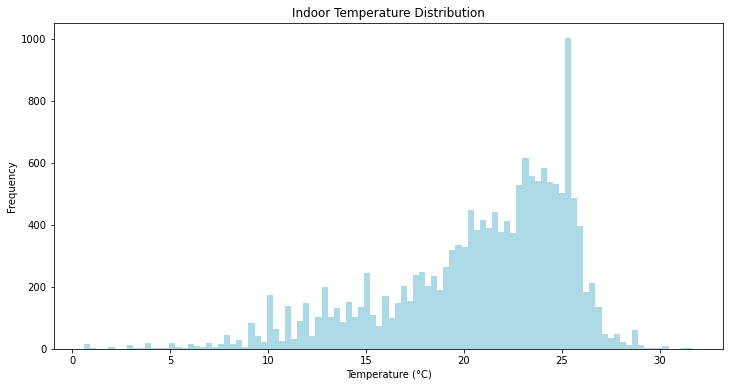

In [75]:
# plot the indoor temperature distribution
plt.figure(figsize=(12, 6))
plt.hist(df['ta'], bins=100, color='lightblue')
plt.title('Indoor Temperature Distribution')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.show()

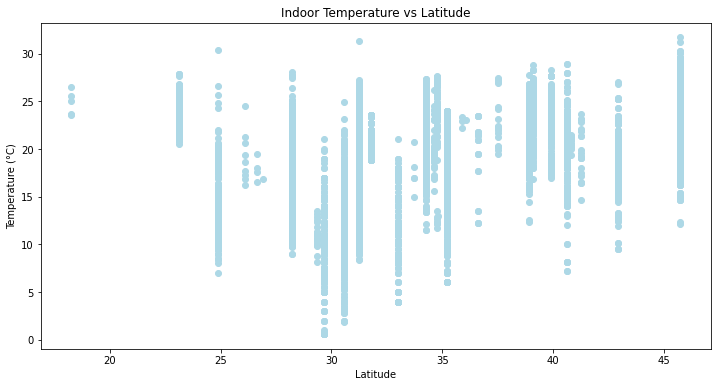

In [76]:
# scatter plot the indoor temperature against latitude
plt.figure(figsize=(12, 6))
plt.scatter(df['latitude'], df['ta'], color='lightblue')
plt.title('Indoor Temperature vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Temperature (°C)')
plt.show()

In [77]:
# acesending the df by latitude
df_city = df_city.sort_values('latitude')
df_city

,city,records,thermal_sensation,thermal_comfort,thermal_acceptability,ta,top,clo,latitude,t_out
6,HainanSanya,5,0.600000,1.600000,0.420000,24.880000,24.880000,0.332000,18.25,NaN
5,GuangdongGuangzhou,997,-0.013039,1.377131,0.462588,23.850150,23.876128,0.859910,23.13,16.710933
32,YunnanKunming,415,-1.154217,1.424242,0.687879,13.617108,13.617108,0.647133,24.87,NaN
2,FujianFuzhou,7,-0.714286,1.571429,0.328571,18.100000,18.100000,0.351429,26.08,NaN
4,FujianZhenjiang,2,-0.500000,1.500000,0.550000,22.900000,22.900000,0.305000,26.10,NaN
3,FujianNanping,4,0.000000,1.000000,0.325000,17.900000,17.900000,0.417500,26.64,NaN
18,HunanHengyang,1,-1.000000,2.000000,-0.100000,16.900000,16.900000,0.660000,26.89,NaN
17,HunanChangsha,1108,-0.396029,2.816697,0.414621,17.222563,17.413267,0.947500,28.23,NaN
29,SichuanZigong,23,-0.217391,1.608696,0.643478,11.026087,11.026087,1.586522,29.34,NaN
20,Lhasa,355,-1.095775,NaN,NaN,10.640845,10.640845,1.253380,29.65,NaN


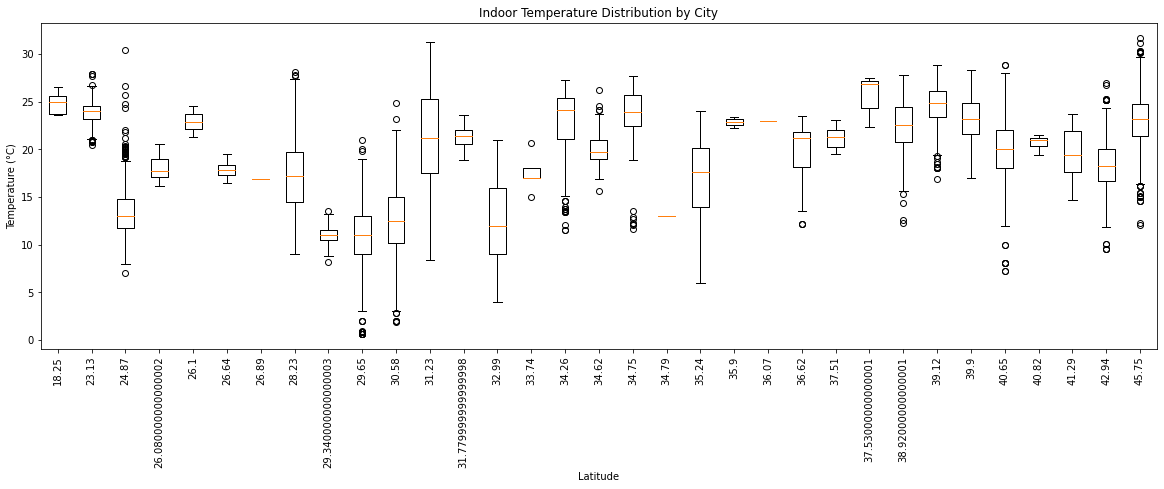

In [78]:
# box plot the indoor temperature distribution by city, show latitude as x-axis
plt.figure(figsize=(20, 6))
plt.boxplot([df[df['city'] == city]['ta'] for city in df_city['city']], labels=df_city['latitude'])
plt.title('Indoor Temperature Distribution by City')
plt.xlabel('Latitude')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=90)  # Rotate x-axis labels by 45 degrees
plt.show() 

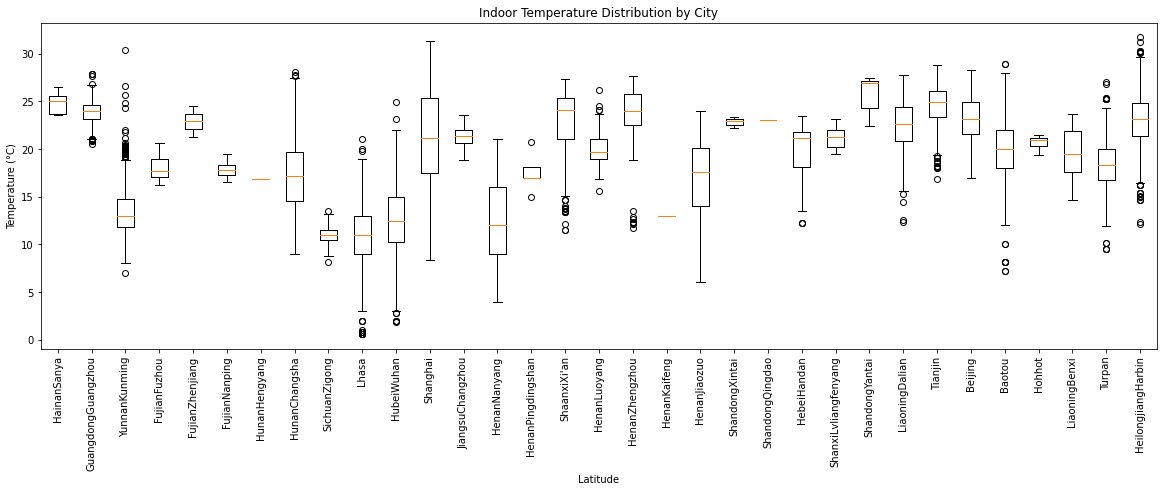

In [79]:
# box plot the indoor temperature distribution by city, show latitude as x-axis
plt.figure(figsize=(20, 6))
plt.boxplot([df[df['city'] == city]['ta'] for city in df_city['city']], labels=df_city['city'])
plt.title('Indoor Temperature Distribution by City')
plt.xlabel('Latitude')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=90)  # Rotate x-axis labels by 45 degrees
plt.show()

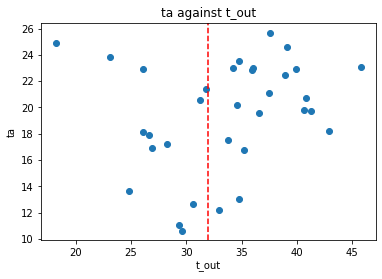

In [80]:
# plot the city mean ta against latitude 
plt.scatter(df_city['latitude'], df_city['ta'])
plt.xlabel('t_out')
plt.ylabel('ta')
plt.title('ta against t_out')
plt.axvline(x=32, color='r', linestyle='--')
plt.show()

## Comfort Vote

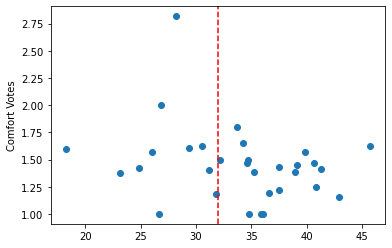

In [55]:
# plot the scatter plot of comfort votes against latitude, data point size is proportional to the number of records
plt.figure(figsize=(6, 4))
x = df_city['latitude']
y = df_city['thermal_comfort']
sizes = df_city['records']  # This will control the size of the points
plt.scatter(x, y)  # Use the 's' parameter to set sizes of points
# draw a vertical line at x=33
plt.axvline(x=32, color='r', linestyle='--')
plt.ylabel('Comfort Votes')
plt.show()

## Acceptability Vote

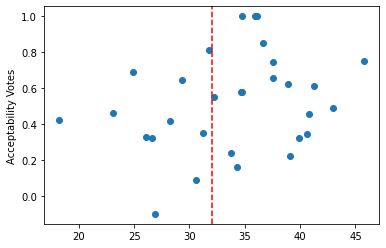

In [56]:
plt.figure(figsize=(6, 4))
x = df_city['latitude']
y = df_city['thermal_acceptability']
sizes = df_city['records']  # This will control the size of the points
plt.scatter(x, y)  # Use the 's' parameter to set sizes of points
# draw a vertical line at x=33
plt.axvline(x=32, color='r', linestyle='--')
plt.ylabel('Acceptability Votes')
plt.show()
